In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import GridSearchCV

In [10]:
dataset = pd.read_csv("dataset/train.csv")
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
dataset = dataset.dropna() # is this correct?
dataset = dataset.drop("Loan_ID", axis=1)
X = dataset.drop('Loan_Status', axis=1)
y = dataset['Loan_Status']

In [12]:
# Convert feature names to strings
X.columns = X.columns.astype(str)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit and transform on the training set
X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train.select_dtypes(include=['object'])))
X_train_encoded.columns = encoder.get_feature_names_out(X_train.select_dtypes(include=['object']).columns)

# Transform on the test set
X_test_encoded = pd.DataFrame(encoder.transform(X_test.select_dtypes(include=['object'])))
X_test_encoded.columns = encoder.get_feature_names_out(X_test.select_dtypes(include=['object']).columns)


# Concatenate encoded features with the original numeric features
X_train_final = pd.concat([X_train.select_dtypes(exclude=['object']).reset_index(drop=True), X_train_encoded], axis=1)
X_test_final = pd.concat([X_test.select_dtypes(exclude=['object']).reset_index(drop=True), X_test_encoded], axis=1)

# Create a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) # random state is a seed.

# Train the model
rf_model.fit(X_train_final, y_train)

predictions = rf_model.predict(X_test_final)
predictions

array(['Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y'], dtype=object)

In [13]:
# Some statistics
accuracy = rf_model.score(X_test_final, y_test)
print(f"Accuracy: {accuracy:.2f}")
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, pos_label='Y')
recall = recall_score(y_test, predictions, pos_label='Y')
f1 = f1_score(y_test, predictions, pos_label='Y')

label_encoder = LabelEncoder()
y_true_numeric = label_encoder.fit_transform(y_test)
predictions_numeric = label_encoder.transform(predictions)

roc_auc = roc_auc_score(y_true_numeric, predictions_numeric)

# Print metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f'AUC-ROC: {roc_auc:.4f}')

# Classification Report
print('\nClassification Report:')
print(classification_report(y_test, predictions))

Accuracy: 0.79
Accuracy: 0.7917
Precision: 0.7869
Recall: 0.9600
F1-Score: 0.8649
AUC-ROC: 0.6845

Classification Report:
              precision    recall  f1-score   support

           N       0.82      0.41      0.55        44
           Y       0.79      0.96      0.86       100

    accuracy                           0.79       144
   macro avg       0.80      0.68      0.71       144
weighted avg       0.80      0.79      0.77       144



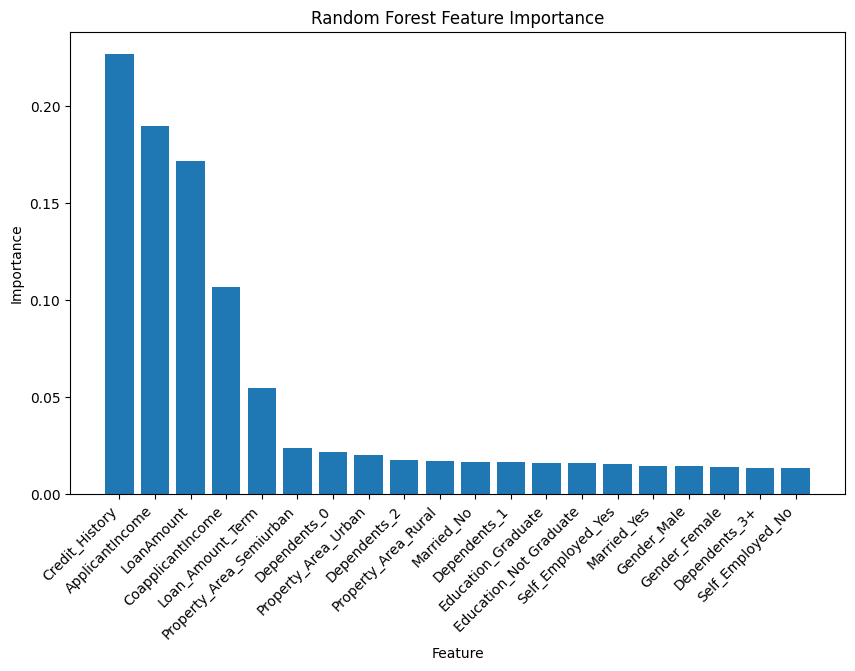

In [14]:
# Get feature importances
feature_importances = rf_model.feature_importances_

# Sort indices by importance
indices = feature_importances.argsort()[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_train_final.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train_final.shape[1]), X_train_final.columns[indices], rotation=45, ha="right")  # Adjusted for better readability
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Random Forest Feature Importance")
plt.show()

In [15]:
# Plotear algunos árboles del Random Forest
n_trees_to_plot = 3
for i in range(n_trees_to_plot):
    plt.figure(figsize=(10, 5))
    plot_tree(rf_model.estimators_[i], feature_names=X.columns, class_names=y.columns, filled=True, rounded=True)
    plt.title(f"Árbol {i + 1}")
    plt.show()

# Evaluar la importancia de las variables
feature_importance = rf_model.feature_importances_

# Plotear la importancia de las variables
plt.bar(range(len(feature_importance)), feature_importance, align='center')
plt.xticks(range(len(feature_importance)), X.columns)
plt.xlabel('Variables')
plt.ylabel('Importance')
plt.title('Variable importance')
plt.show()

AttributeError: 'Series' object has no attribute 'columns'

<Figure size 1000x500 with 0 Axes>